In [7]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import cm

In [2]:
L = 1.0e-2
H = 1.0e-2

nx =21
ny =21
nt =500

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

alpha = 1e-4

Ti = numpy.ones((ny,nx))*20
Ti[0,:] = 100
Ti[:,0] = 100


In [4]:
def ftcs(T,nt,alpha,dt,dx,dy):
    
    j_mid = int((numpy.shape(T)[0])/2)
    i_mid = int((numpy.shape(T)[1])/2)
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1,1:-1] = Tn[1:-1,1:-1] +alpha *\
        (dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[:-2,1:-1]) +\
             dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]))
        
        T[-1,:] = T[-2,:]
        T[:,-1] = T[:,-2]
        
        if T[j_mid,i_mid] >= 70:
            
            print ("Center of plate reached 70C at time {0:.2f}s.".format(dt*n))
            break
        
    if T[j_mid, i_mid]<70:
        print ("Center has not reached 70C yet, it is only {0:.2f}C.".format(T[j_mid, i_mid]))
        
    return T

In [5]:
sigma = 0.25
dt = sigma * min(dx,dy)**2 / alpha
T = ftcs(Ti.copy(),nt,alpha,dt,dx,dy)

Center of plate reached 70C at time 0.16s.


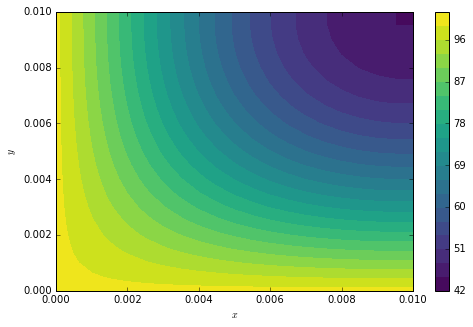

In [8]:
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,T,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();